In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Rastrigin Function
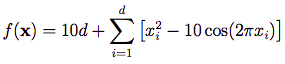

In [2]:
def rastrigin(populacao):
    y = []
    for ind in populacao:
        ind_x = 10 + ind[0]**2 - 10*math.cos(2*math.pi*ind[0])
        ind_y = 10 + ind[1]**2 - 10*math.cos(2*math.pi*ind[1])
        ind_z = 10 + ind[2]**2 - 10*math.cos(2*math.pi*ind[2])
        result = ind_x + ind_y + ind_z
        y.append(result)
    return y

In [3]:
teste = [[0,0,0],[1,1,1]]
rastrigin(teste)

[0.0, 3.0]

# Inicializar população

In [4]:
def inic_pop(n_ind,seed):
    random.seed(seed)
    populacao = []
    
    for i in range(n_ind):
      ind = []
      for j in range(3):
        rand = random.uniform(-5.12,5.12)
        ind.append(rand)
      populacao.append(ind)
    
    return populacao

In [5]:
#Teste
pop = inic_pop(10,4)
print(pop)

[[-2.7028675610886705, -4.063579809477471, -1.0643635956666264], [-3.533083946983319, -4.438885420240999, -1.0077080116728334], [4.279859641218242, 3.07663207931708, 2.71526504965569], [-2.8474554809311474, 0.3756032837100909, -2.28676973115955], [-3.3519152201178226, -4.032683085501132, -2.9245395703918953], [4.37735046582334, 3.3681412994910156, 3.1401200302317926], [3.0765858666799746, -3.139219271482982, -1.9471364372527558], [1.3002301687104527, 2.374601818918072, 3.631599185831395], [3.891719693938682, -4.232005093018401, 1.0839232892915698], [1.7582229147286865, 0.06096666327465261, -3.2994286157743673]]


# Seleção

## Roleta

In [6]:
def roleta(result):
  soma = sum(result)
  result_tmp = np.array(result)
  percent = ((soma/result_tmp)/(sum(soma/result_tmp)))
  cumulativo = np.cumsum(percent)

  pais = []
  for i in range(len(result_tmp)):
    rand = random.uniform(0,1)
    escolha = cumulativo-rand
    indice = np.where(escolha >= 0)[0][0]
    pais.append(indice)
  return pais

In [7]:
result = rastrigin(pop)

In [8]:
soma = sum(result)
result_tmp = np.array(result)
percent = ((soma/result_tmp)/(sum(soma/result_tmp)))

In [9]:
result_tmp

array([39.46339304, 72.27006559, 60.32281191, 47.11826559, 53.33879631,
       77.93209412, 28.38164197, 67.44700083, 46.68677657, 37.24563427])

In [10]:
percent

array([0.12248263, 0.06688219, 0.08012856, 0.102584  , 0.09062035,
       0.06202297, 0.17030657, 0.07166487, 0.1035321 , 0.12977575])

In [11]:
pop = inic_pop(10,4)
result = rastrigin(pop)
print(result)
roleta(result)

[39.46339304434581, 72.27006559053157, 60.32281190966392, 47.11826558801578, 53.338796309263586, 77.93209412383587, 28.381641969873126, 67.44700083496639, 46.686776568147344, 37.24563427437165]


[5, 0, 9, 8, 6, 3, 9, 6, 9, 8]

## Torneio

In [12]:
def torneio(result):
    
    pais = np.random.randint(len(result), size=(2, len(result))) #torneio entre 2
    #print('pais: 'pais)
    ind_a = pais[0, :]
    ind_b = pais[1, :]
    result_a = np.array(result)[ind_a]
    result_b = np.array(result)[ind_b]
    #print('primeiro: ',result_a)
    #print('segundo: ',result_b)
    criterio = result_a < result_b
    
    ind_pais = []
    
    for i in range(len(result)):
      if criterio[i]:
        ind_pais.append(ind_a[i])
      else:
        ind_pais.append(ind_b[i])

            
    return ind_pais

In [13]:
print(result)
torneio(result)

[39.46339304434581, 72.27006559053157, 60.32281190966392, 47.11826558801578, 53.338796309263586, 77.93209412383587, 28.381641969873126, 67.44700083496639, 46.686776568147344, 37.24563427437165]


[6, 6, 9, 4, 4, 4, 6, 3, 6, 1]

# Cruzamento

In [14]:
def cruzamento(indices_selec, pop, taxa_cruz):
  
  pais = np.random.randint(len(indices_selec), size=(2, int(len(indices_selec)/2))) #metade pois cada par irá gerar 2 filhos

  ind_a = pais[0, :]
  ind_b = pais[1, :]


  pop_nova = []

  for i in range(len(ind_a)):  #numero de casais formados
    p1 = pop[ind_a[i]]
    p2 = pop[ind_b[i]]
        
    ponto_troca = np.random.randint(3) #trocar x, y ou z entre si  
    ponto_cruzamento = random.uniform(0,1)   #comparar com probabilidade
    
    if ponto_cruzamento <= taxa_cruz:
      #print("trocou em ",i," valor ",ponto_troca)
      filho1 = p1
      filho2 = p2
      temp = filho1[ponto_troca]
      filho1[ponto_troca] = filho2[ponto_troca]
      filho2[ponto_troca] = temp
      pop_nova.append(filho1)
      pop_nova.append(filho2)
    
    else:
      pop_nova.append(p1)
      pop_nova.append(p2)

  return pop_nova

In [15]:
teste = roleta(result)
print(pop)
cruzamento(teste,pop,0.5)

[[-2.7028675610886705, -4.063579809477471, -1.0643635956666264], [-3.533083946983319, -4.438885420240999, -1.0077080116728334], [4.279859641218242, 3.07663207931708, 2.71526504965569], [-2.8474554809311474, 0.3756032837100909, -2.28676973115955], [-3.3519152201178226, -4.032683085501132, -2.9245395703918953], [4.37735046582334, 3.3681412994910156, 3.1401200302317926], [3.0765858666799746, -3.139219271482982, -1.9471364372527558], [1.3002301687104527, 2.374601818918072, 3.631599185831395], [3.891719693938682, -4.232005093018401, 1.0839232892915698], [1.7582229147286865, 0.06096666327465261, -3.2994286157743673]]


[[3.891719693938682, -4.232005093018401, -1.0643635956666264],
 [-2.7028675610886705, -4.063579809477471, 1.0839232892915698],
 [1.3002301687104527, 2.374601818918072, 3.631599185831395],
 [4.37735046582334, 3.3681412994910156, 3.1401200302317926],
 [1.7582229147286865, -4.032683085501132, -3.2994286157743673],
 [1.7582229147286865, -4.032683085501132, -3.2994286157743673],
 [1.7582229147286865, -4.032683085501132, -3.2994286157743673],
 [-3.3519152201178226, 0.06096666327465261, -2.9245395703918953],
 [1.7582229147286865, -4.032683085501132, -3.2994286157743673],
 [4.37735046582334, 3.3681412994910156, 3.1401200302317926]]

# Mutação

In [16]:
#https://stackoverflow.com/questions/51843297/convert-real-numbers-to-binary-and-vice-versa-in-python
def float_to_binary(x, m, n):
    """Convert the float value `x` to a binary string of length `m + n`
    where the first `m` binary digits are the integer part and the last
    'n' binary digits are the fractional part of `x`.
    """
    x_scaled = round(x * 2 ** n)
    return '{:0{}b}'.format(x_scaled, m + n)

def binary_to_float(bstr, m, n):
    """Convert a binary string in the format given above to its float
    value.
    """
    return int(bstr, 2) / 2 ** n

print(float_to_binary(0.95, 0, 8))
print(binary_to_float('11110011', 0, 8))

11110011
0.94921875


In [17]:
def mutacao(pop, taxa_mut, tam_bin):   #tam_bin é quantidade de casas binarias. 8 parece um numero interessante. Dá pra testar outros
  tam_mutantes = int((len(pop)*taxa_mut))
  
  for i in range(tam_mutantes):
    
    ind_mut = np.random.randint(0,len(pop))    #seleciona indice mutacionado
    ponto_mut = np.random.randint(3)           #seleciona se muda x,y,z
    mut = float_to_binary(pop[i][ponto_mut],0,tam_bin) #converte
    #print(mut)                                  
    bit_mut = np.random.randint(tam_bin)       #escolhe bit
    novo_bit=''
    if mut[bit_mut] == '0':
      novo_bit = '1'
    else:
      novo_bit = '0'
                                     
    mut2 = '' 
    for i in range(tam_bin):           #trecho só pq string é imutavel. Cria outra.
     if i != bit_mut:
        mut2+=mut[i]
     else:
        mut2+=novo_bit
    #print(mut2)
    #print(pop[i])
    pop[i][ponto_mut] = binary_to_float(mut2,0,8)
    #print(pop[i])
  return pop

In [18]:
print(pop)
print(mutacao(pop,0.1,8))

[[-2.7028675610886705, -4.063579809477471, 1.0839232892915698], [-3.533083946983319, -4.438885420240999, -1.0077080116728334], [4.279859641218242, 3.07663207931708, 2.71526504965569], [-2.8474554809311474, 0.3756032837100909, -2.28676973115955], [-3.3519152201178226, 0.06096666327465261, -2.9245395703918953], [4.37735046582334, 3.3681412994910156, 3.1401200302317926], [3.0765858666799746, -3.139219271482982, -1.9471364372527558], [1.3002301687104527, 2.374601818918072, 3.631599185831395], [3.891719693938682, -4.232005093018401, -1.0643635956666264], [1.7582229147286865, -4.032683085501132, -3.2994286157743673]]
[[-2.7028675610886705, -4.063579809477471, 1.0839232892915698], [-3.533083946983319, -4.438885420240999, -1.0077080116728334], [4.279859641218242, 3.07663207931708, 2.71526504965569], [-2.8474554809311474, 0.3756032837100909, -2.28676973115955], [-3.3519152201178226, 0.06096666327465261, -2.9245395703918953], [4.37735046582334, 3.3681412994910156, 3.1401200302317926], [3.0765858

# Elitismo

In [19]:
def selecElitismo(pop,result,taxa_elit):
  qnt_elite = int(len(result)*taxa_elit)
  fx_elite = sorted(result)[:qnt_elite]
  indices_elite = list(np.argsort(result)[:qnt_elite])

  return indices_elite

In [20]:
def elitismo(pop,elite,resultPop):
  resultElite = rastrigin(elite)
  resultTodo = []
  resultTodo = resultPop + resultElite
  indices_elite_aux = list(np.argsort(resultTodo))
  pop_Todo = pop
  for i in range(len(elite)):
    pop_Todo.append(list(elite[i]))
  
  indices_elite_final = indices_elite_aux[:len(pop_Todo)-len(elite)]
  pop_final = []
    
  for ind in indices_elite_final:
    pop_final.append(pop_Todo[ind])
  
  
  return pop_final

#Plot

In [21]:
def plot_resultados(resultados, media_resultados):
    
    # Resultado Geral
    plt.figure(figsize=(20,10))
    plt.plot(resultados, 'blue')
        
    plt.title('Resultado Geral')
    plt.xlabel('Geração')
    plt.ylabel('f(x)')
    plt.legend(['Melhor Performance da Geração'])
    plt.grid()
    plt.show()

    # Resultado Médio
    plt.figure(figsize=(20,10))
    plt.plot(media_resultados, 'black')

    plt.title('Resultado Médio')
    plt.xlabel('Geração')
    plt.ylabel('f(x)')
    plt.legend(['Performance Média da Geração'])
    plt.rcParams['figure.figsize'] = (20,10)
    plt.grid()
    plt.show()

#Execução

In [22]:
def algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin):

  media_resultados = []
  resultados = []

  popu = inic_pop(qnt_populacao, seed) #Inicializa populacao
  result = rastrigin(popu) #Aplica individuos na funcao objetivo
  
  for i in range(n_geracoes):
      # Captura dos índices e resultados com melhor desempenho
      #print('seleciona elite')
      ind_elite = []
      ind_elite = selecElitismo(popu,result,taxa_elit) 
      elite = list(np.array(popu)[ind_elite])
      
      
      # (2) Seleção
      #print('selecao')
      if selecao == 'roleta':
        pais = roleta(result)
      else:
        pais = torneio(result)
      
      # (3) Cruzamento
      #print('Ok')
      pop_cruz = cruzamento(pais,popu,taxa_cruz)
      
      #print('mutacao')
      # (4) Mutação
      pop_mut = mutacao(pop_cruz,taxa_mut,tam_bin)
      
      

      #print('result pre elitismo')
      resultPop = rastrigin(pop_mut)
      # (5) Elitismo
      #print('elitismo')
      popu = []
      popu = elitismo(pop_mut,elite,resultPop)
      
    
      # Resultados
     # print('result final')
      result = rastrigin(popu)
      media_resultados.append(np.mean(result))
      resultados.append(min(result))

      if i == (n_geracoes - 1):
          print('O valor mínimo obtido foi', min(result))

          print('Os valores numéricos de entrada que trouxeram esse resultado foram', popu[np.argmin(result)])
    
  plot_resultados(resultados, media_resultados)
  return popu

In [23]:
#Tabela final:
#Tam Pop | Taxa Cruz | Taxa Elitismo | Funcao Selec || Valor Minimo | Num Geracoes

O valor mínimo obtido foi 3.201022982194205
Os valores numéricos de entrada que trouxeram esse resultado foram [1.0734574287894931, 0.006001797635054373, 0.99609375]


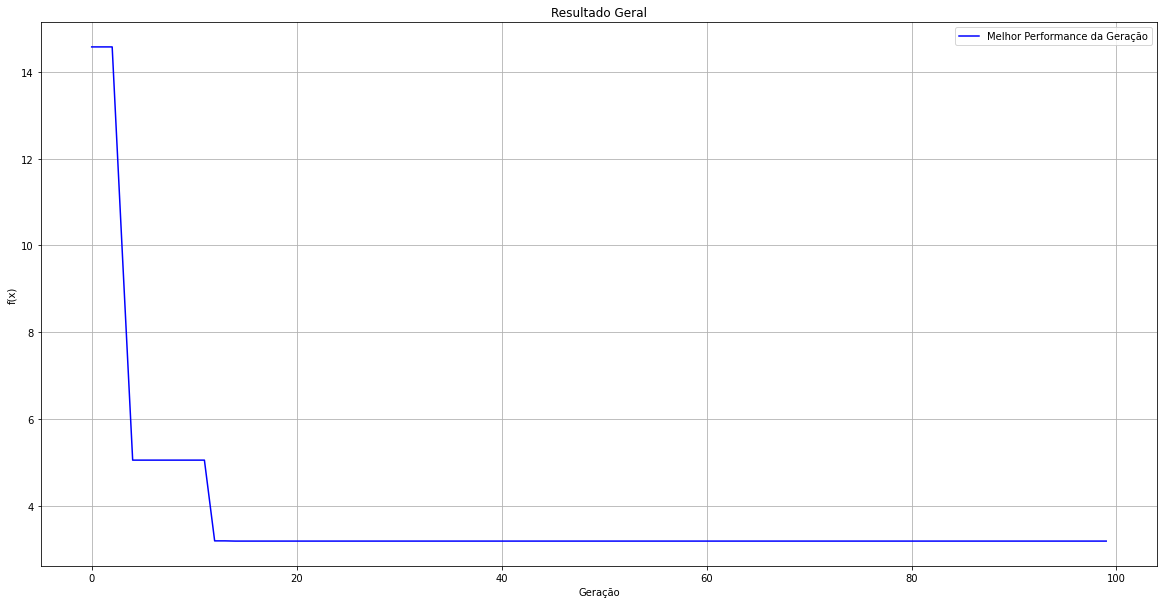

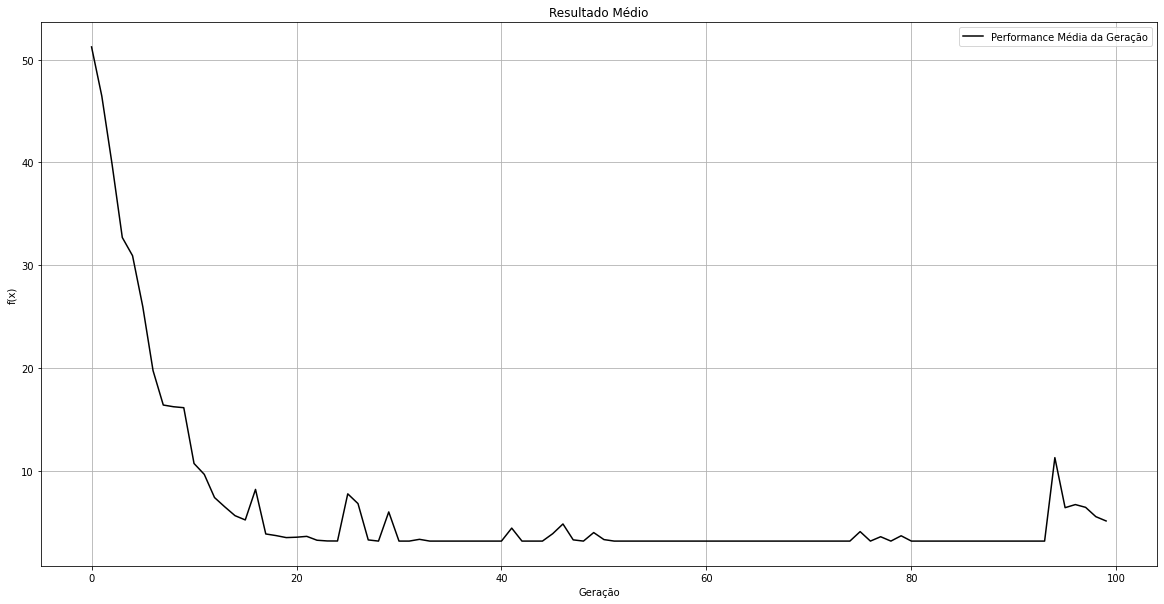

CPU times: user 768 ms, sys: 22.3 ms, total: 790 ms
Wall time: 807 ms


In [24]:
#Teste 1
%%time
qnt_populacao = 100
selecao = 'roleta'
taxa_cruz = 0.1
taxa_mut = 0.1
taxa_elit = 0.1

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)

O valor mínimo obtido foi 2.920623987334979
Os valores numéricos de entrada que trouxeram esse resultado foram [1.0508454679613424, -0.03351258599556761, 0.9732221762721256]


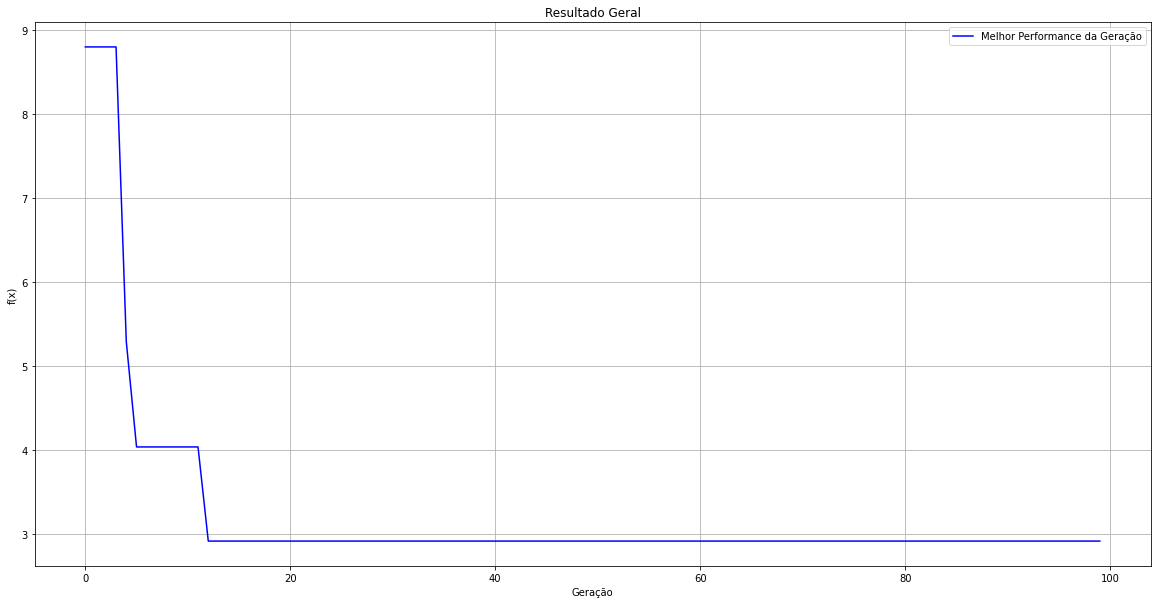

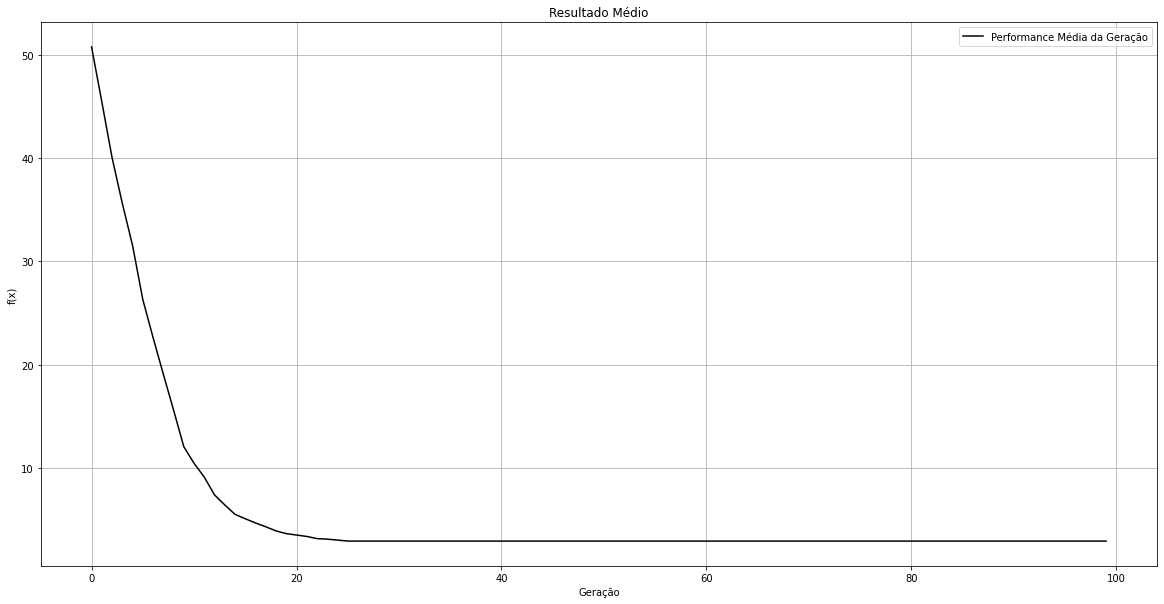

CPU times: user 1.53 s, sys: 17.7 ms, total: 1.55 s
Wall time: 1.55 s


In [25]:
#Teste 2
%%time
qnt_populacao = 500
selecao = 'roleta'
taxa_cruz = 0.1
taxa_mut = 0.1
taxa_elit = 0.1

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)

O valor mínimo obtido foi 0.23119031485547836
Os valores numéricos de entrada que trouxeram esse resultado foram [-0.017760849306533544, 0.02918792109581858, 0.0007977325633934385]


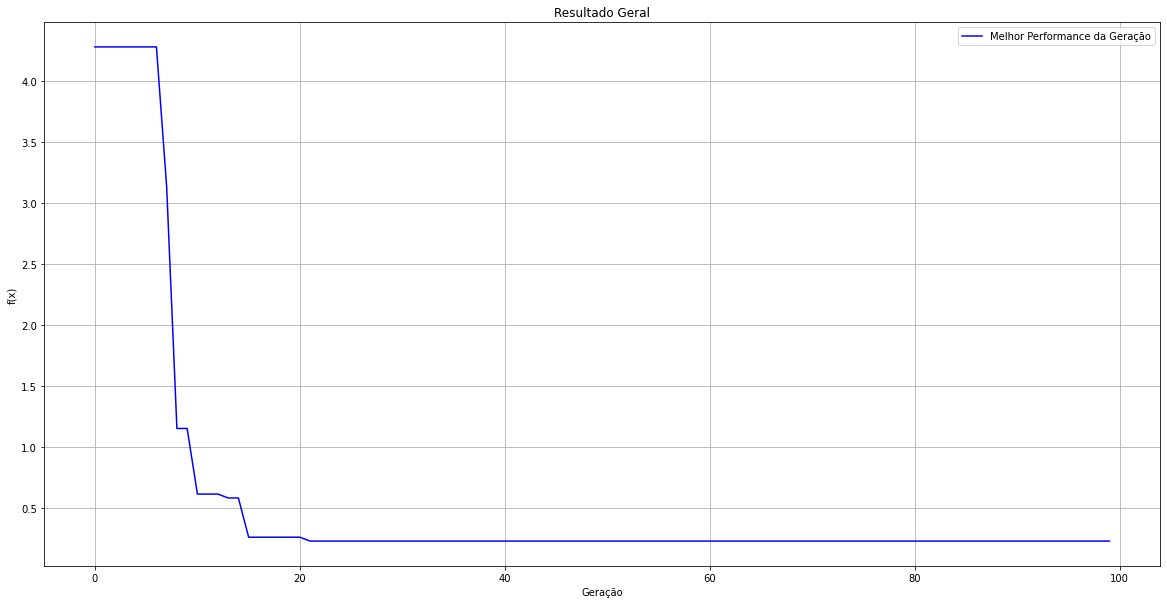

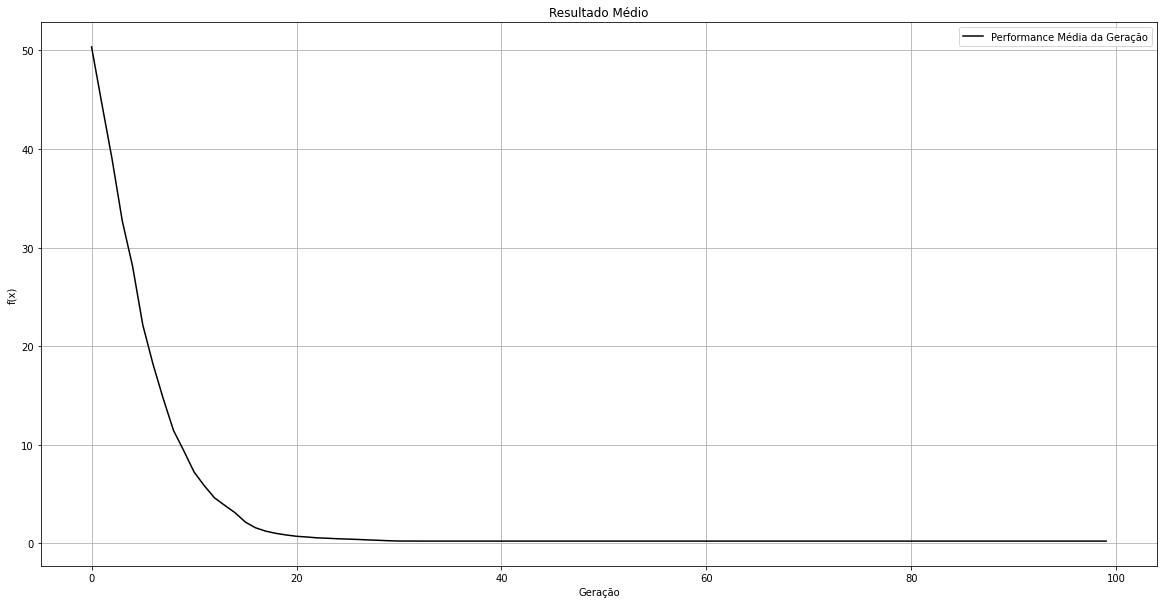

CPU times: user 2.68 s, sys: 27.5 ms, total: 2.71 s
Wall time: 2.71 s


In [26]:
#Teste 3
%%time
qnt_populacao = 1000
selecao = 'roleta'
taxa_cruz = 0.1
taxa_mut = 0.1
taxa_elit = 0.1

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)

O valor mínimo obtido foi 0.07274232038001216
Os valores numéricos de entrada que trouxeram esse resultado foram [-0.017760849306533544, -0.0071350754410470785, 0.0007977325633934385]


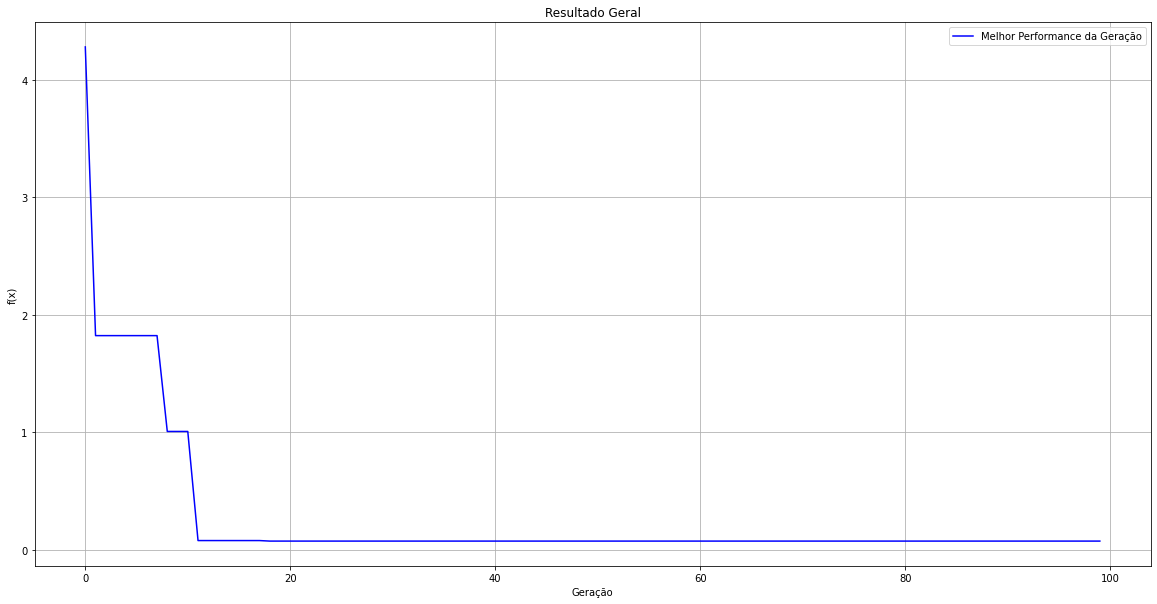

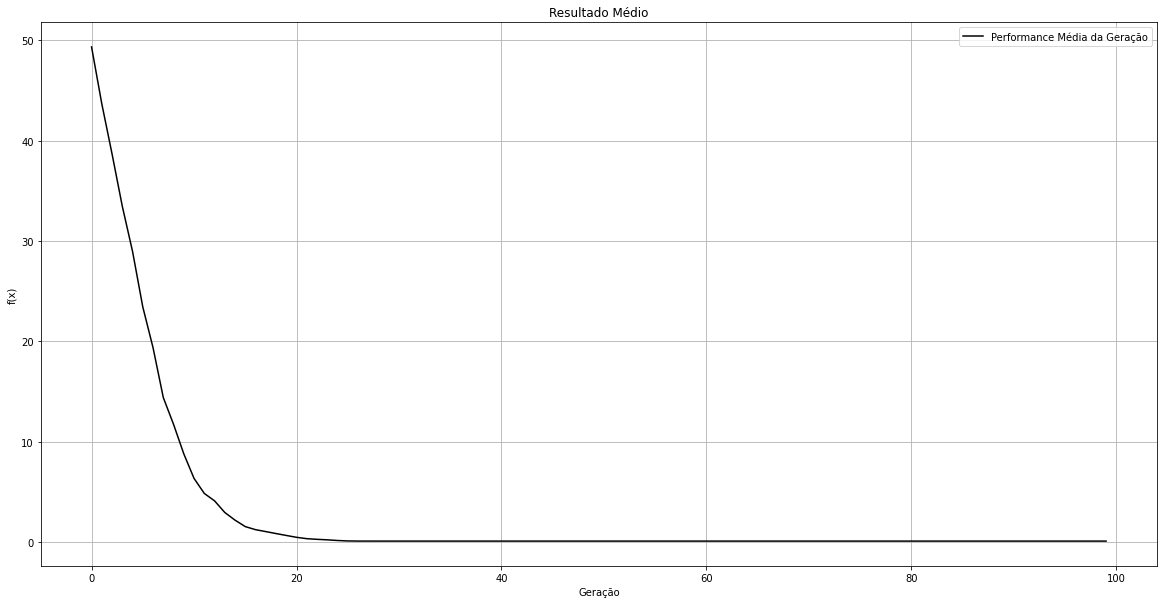

CPU times: user 2.02 s, sys: 12.1 ms, total: 2.03 s
Wall time: 2.04 s


In [27]:
#Teste 4
%%time
qnt_populacao = 1000
selecao = 'Torneio'
taxa_cruz = 0.1
taxa_mut = 0.1
taxa_elit = 0.1

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)

O valor mínimo obtido foi 0.01223272505148465
Os valores numéricos de entrada que trouxeram esse resultado foram [-0.0078125, 0.0, 0.0007977325633934385]


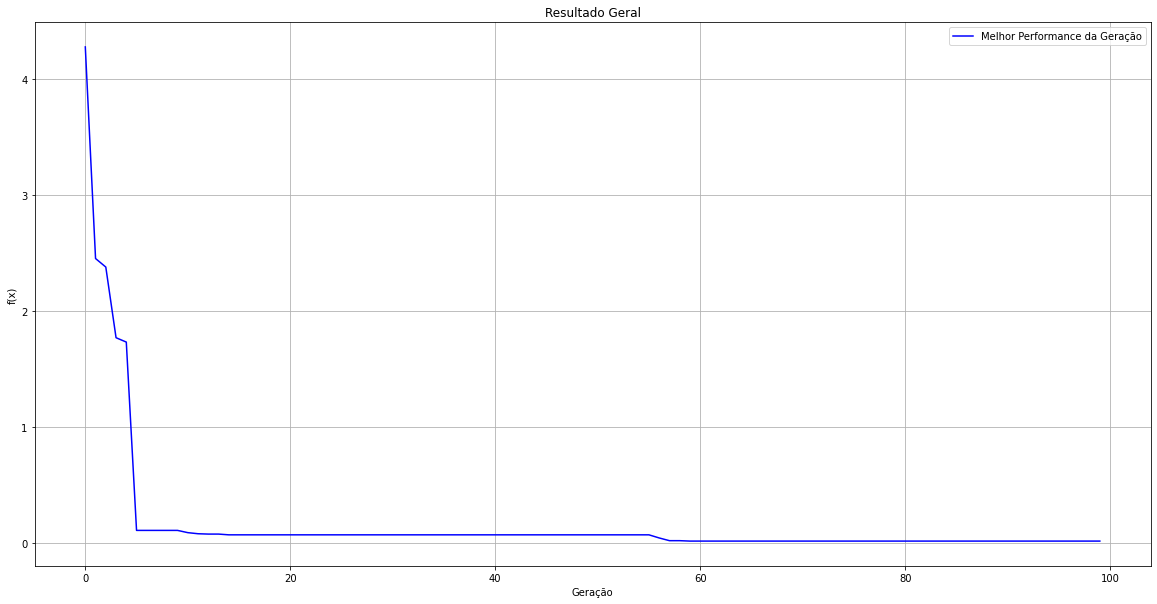

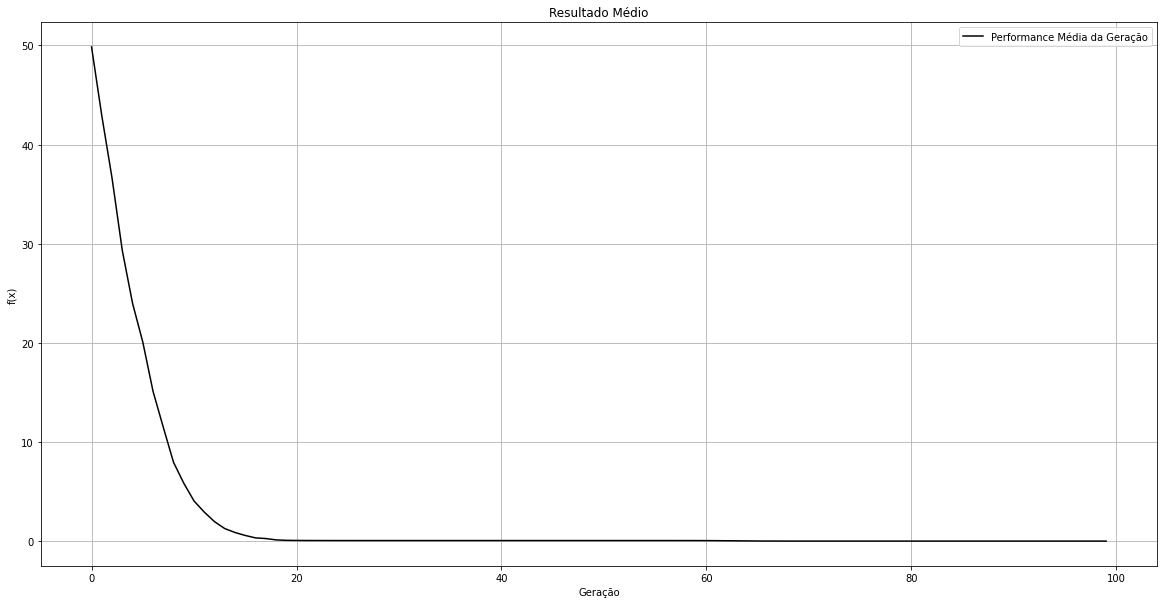

CPU times: user 2 s, sys: 13.8 ms, total: 2.02 s
Wall time: 2.02 s


In [32]:
#Teste 5
%%time
qnt_populacao = 1000
selecao = 'Torneio'
taxa_cruz = 0.9
taxa_mut = 0.1
taxa_elit = 0.1

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)

O valor mínimo obtido foi 0.011784714218398662
Os valores numéricos de entrada que trouxeram esse resultado foram [0.004769603786082044, 0.006001797635054373, 0.0007977325633934385]


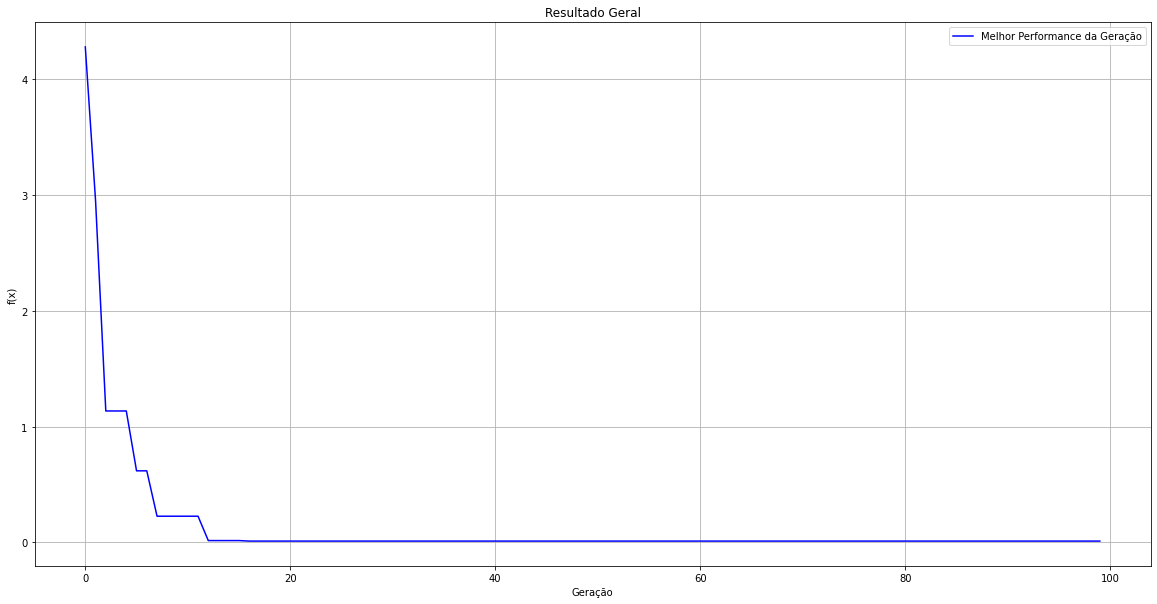

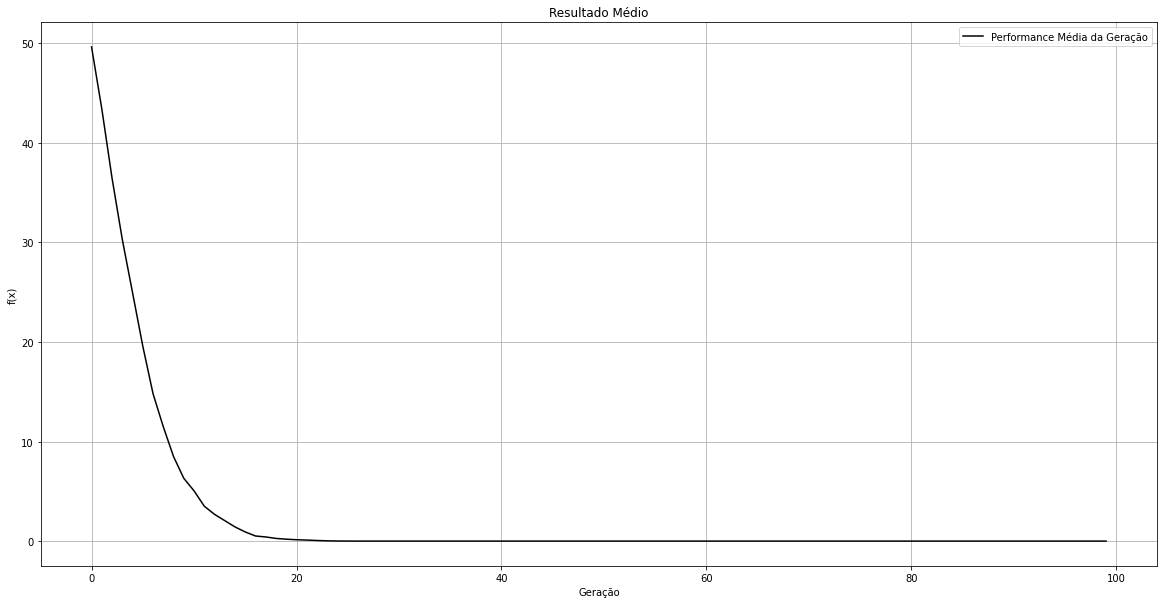

CPU times: user 1.97 s, sys: 13.7 ms, total: 1.98 s
Wall time: 2 s


In [34]:
#Teste 6
%%time
qnt_populacao = 1000
selecao = 'Torneio'
taxa_cruz = 0.5
taxa_mut = 0.1
taxa_elit = 0.1

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)

O valor mínimo obtido foi 0.01223272505148465
Os valores numéricos de entrada que trouxeram esse resultado foram [-0.0078125, 0.0, 0.0007977325633934385]


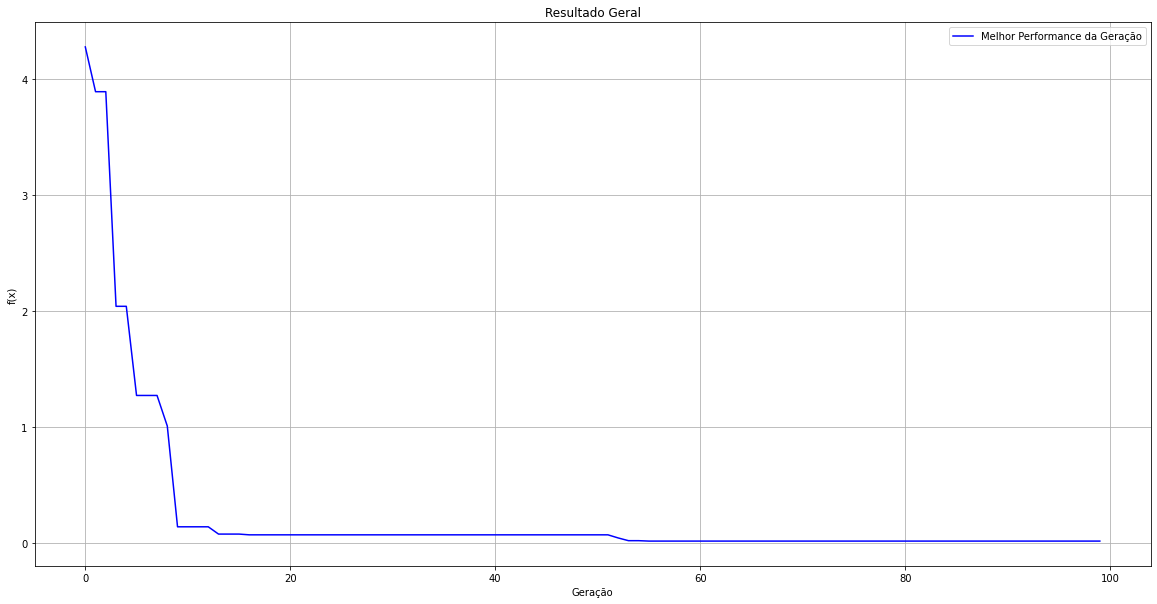

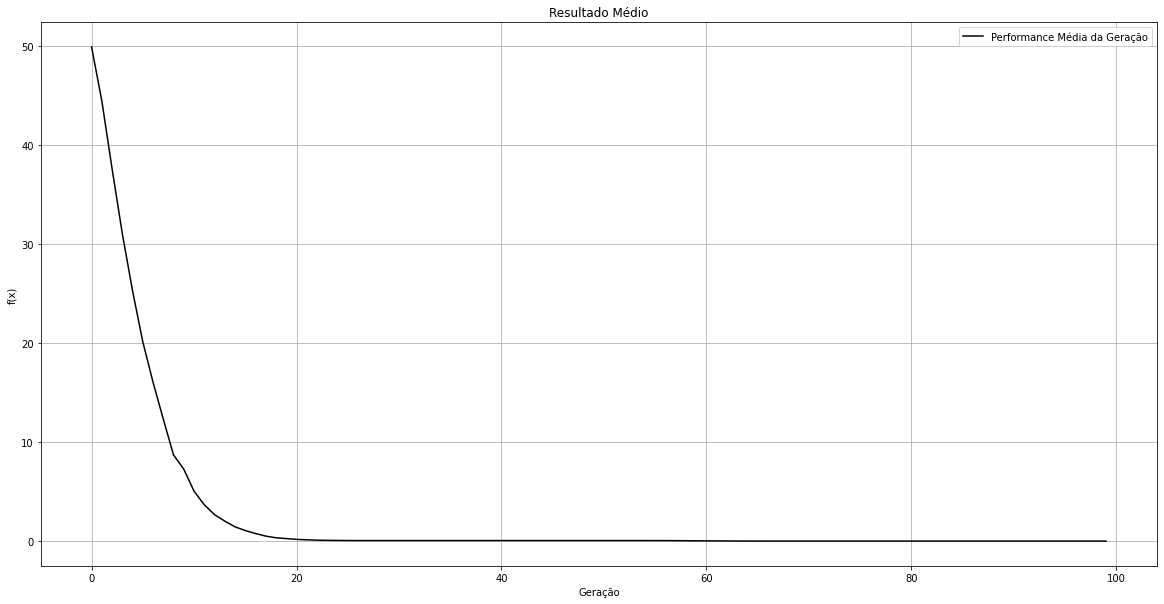

CPU times: user 3.48 s, sys: 7.57 ms, total: 3.48 s
Wall time: 3.51 s


In [36]:
#Teste 7
%%time
qnt_populacao = 1000
selecao = 'Torneio'
taxa_cruz = 0.5
taxa_mut = 0.9
taxa_elit = 0.1

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)

O valor mínimo obtido foi 0.0051831387831065
Os valores numéricos de entrada que trouxeram esse resultado foram [0.002686428735622748, -0.0042747773679865375, 0.0007977325633934385]


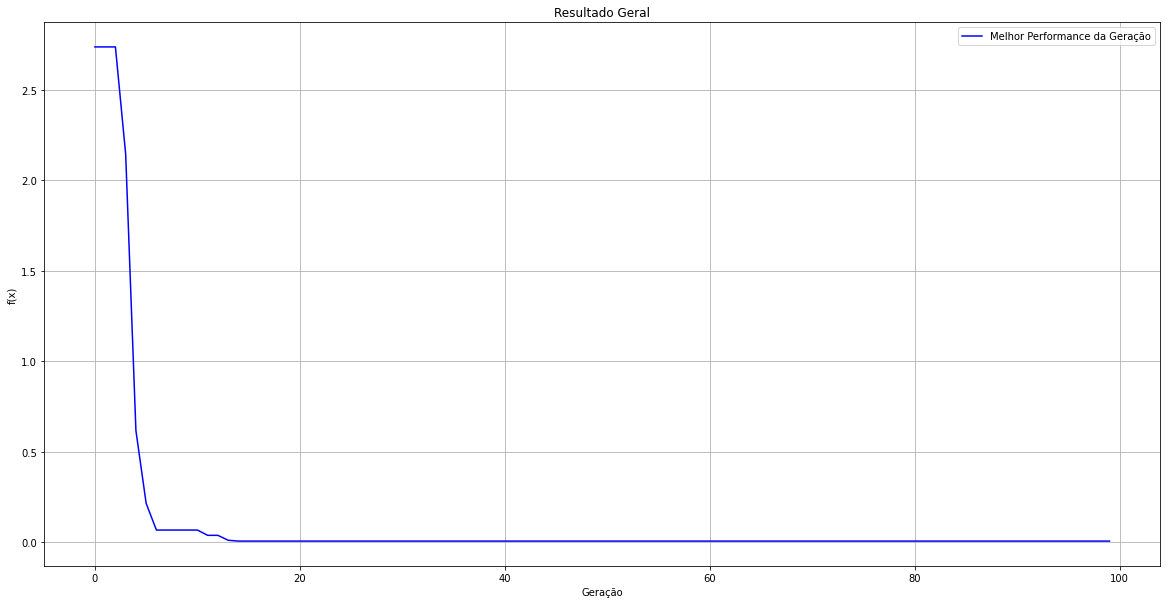

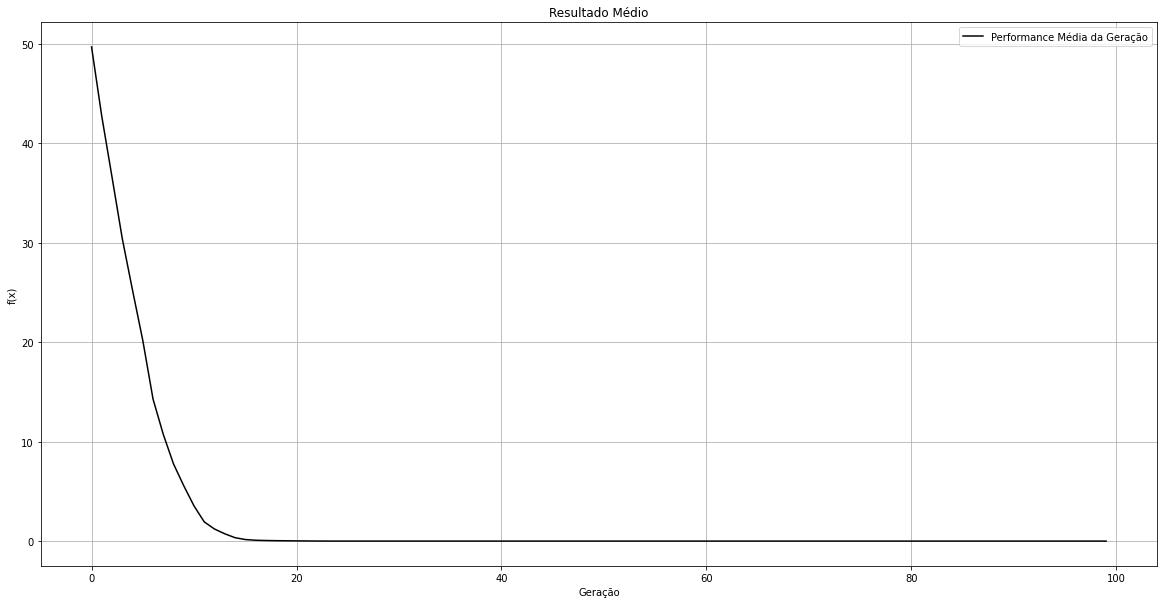

CPU times: user 2.73 s, sys: 20.9 ms, total: 2.75 s
Wall time: 2.76 s


In [37]:
#Teste 8
%%time
qnt_populacao = 1000
selecao = 'Torneio'
taxa_cruz = 0.5
taxa_mut = 0.5
taxa_elit = 0.1

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)

O valor mínimo obtido foi 0.0051831387831065
Os valores numéricos de entrada que trouxeram esse resultado foram [0.002686428735622748, -0.0042747773679865375, 0.0007977325633934385]


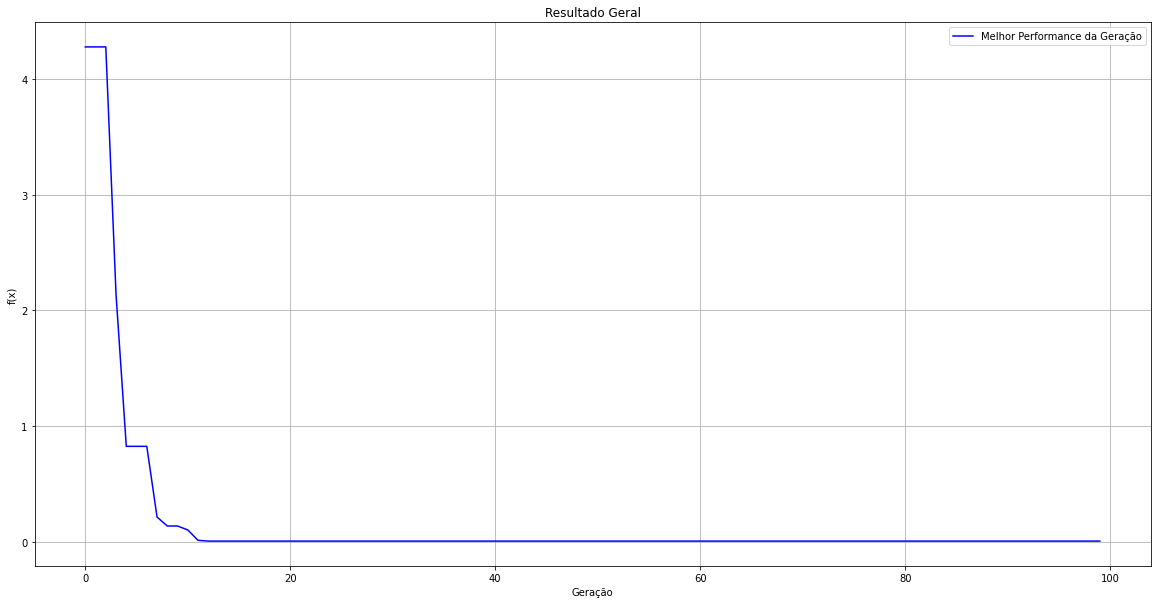

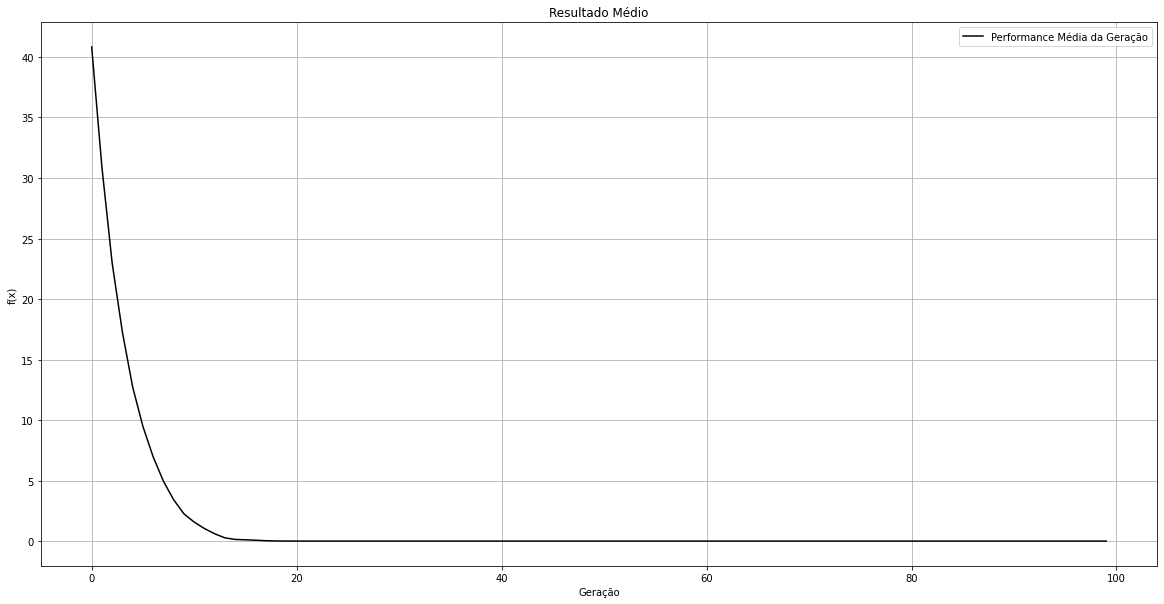

CPU times: user 3.33 s, sys: 10.8 ms, total: 3.34 s
Wall time: 3.35 s


In [39]:
#Teste 9
%%time
qnt_populacao = 1000
selecao = 'Torneio'
taxa_cruz = 0.5
taxa_mut = 0.5
taxa_elit = 0.9

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)

O valor mínimo obtido foi 0.0019751417207274358
Os valores numéricos de entrada que trouxeram esse resultado foram [0.002686428735622748, -0.0014500545250095698, 0.0007977325633934385]


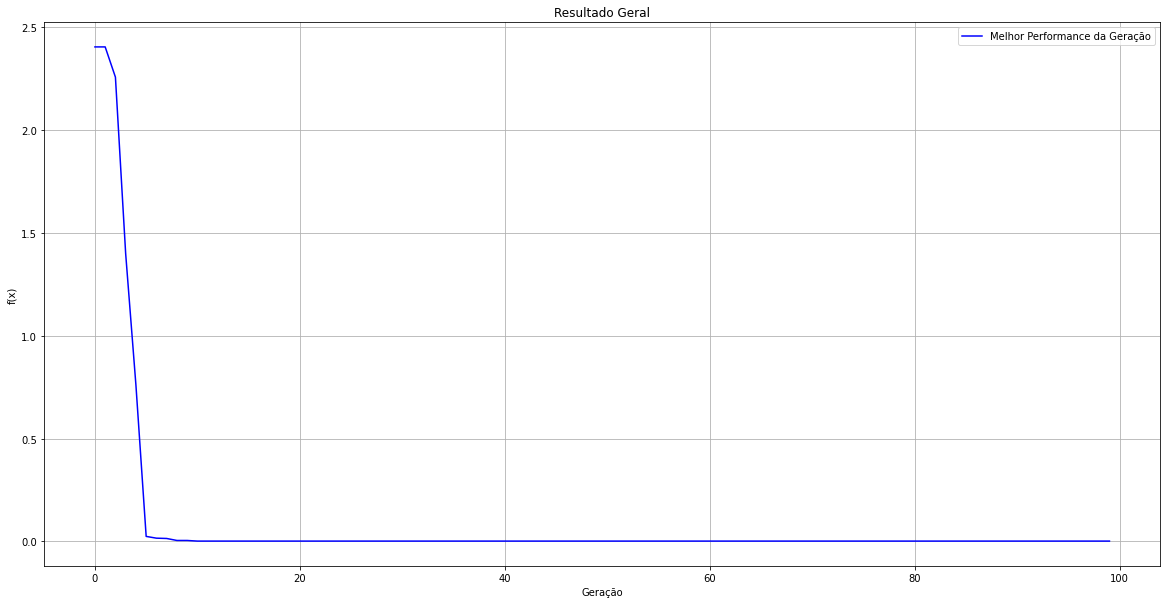

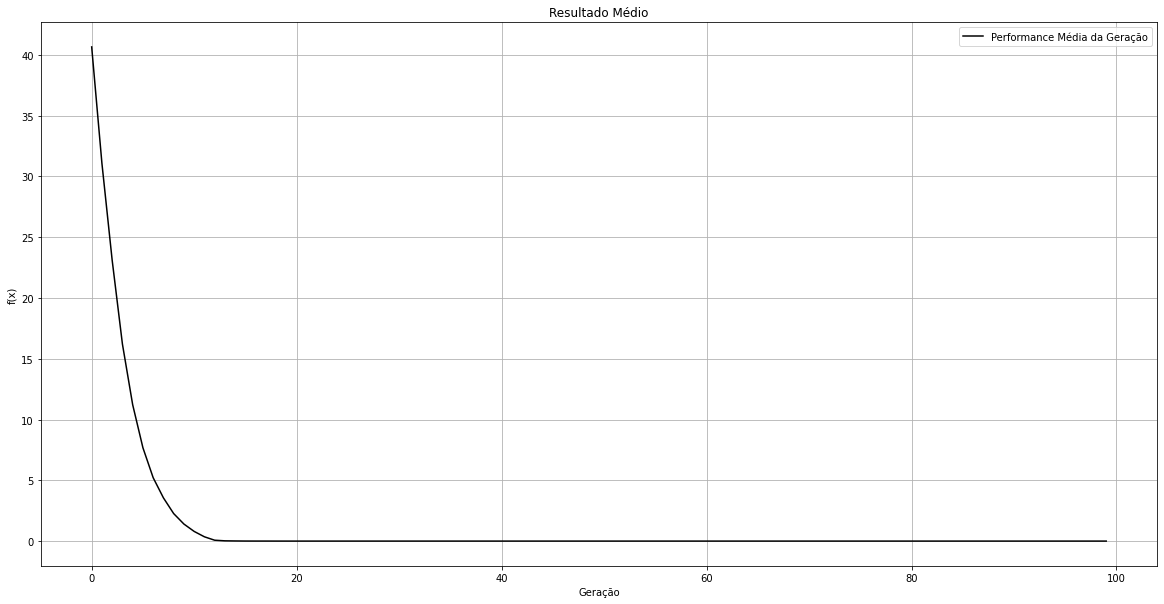

CPU times: user 3.11 s, sys: 12.9 ms, total: 3.12 s
Wall time: 3.14 s


In [41]:
#Teste 10
%%time
qnt_populacao = 1000
selecao = 'Torneio'
taxa_cruz = 0.5
taxa_mut = 0.5
taxa_elit = 0.5

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)

O valor mínimo obtido foi 2.7965680734670535
Os valores numéricos de entrada que trouxeram esse resultado foram [1.0734574287894931, 0.006001797635054373, 0.054838150178430745]


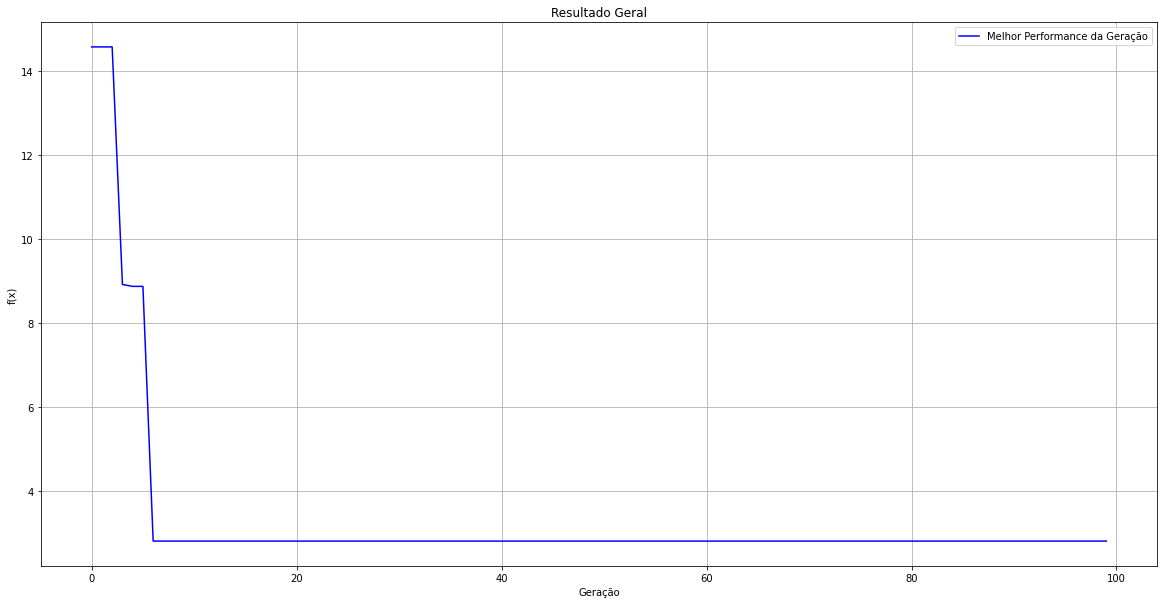

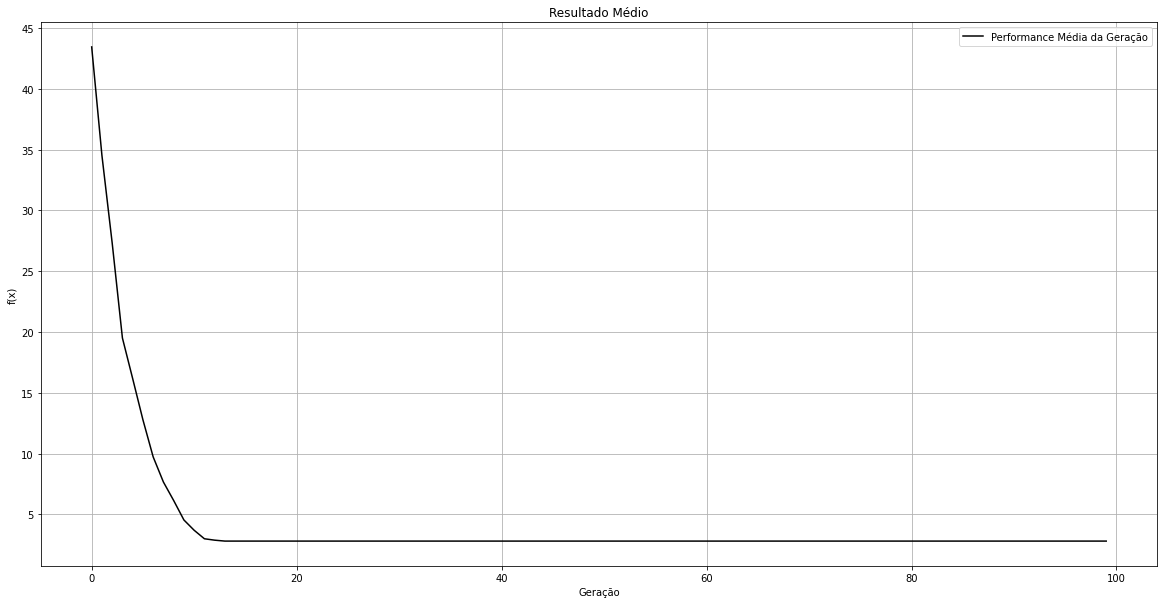

CPU times: user 768 ms, sys: 18.2 ms, total: 786 ms
Wall time: 792 ms


In [42]:
#Teste 11
%%time
qnt_populacao = 100
selecao = 'Torneio'
taxa_cruz = 0.5
taxa_mut = 0.5
taxa_elit = 0.5

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)

O valor mínimo obtido foi 0.0051831387831065
Os valores numéricos de entrada que trouxeram esse resultado foram [0.002686428735622748, -0.0042747773679865375, 0.0007977325633934385]


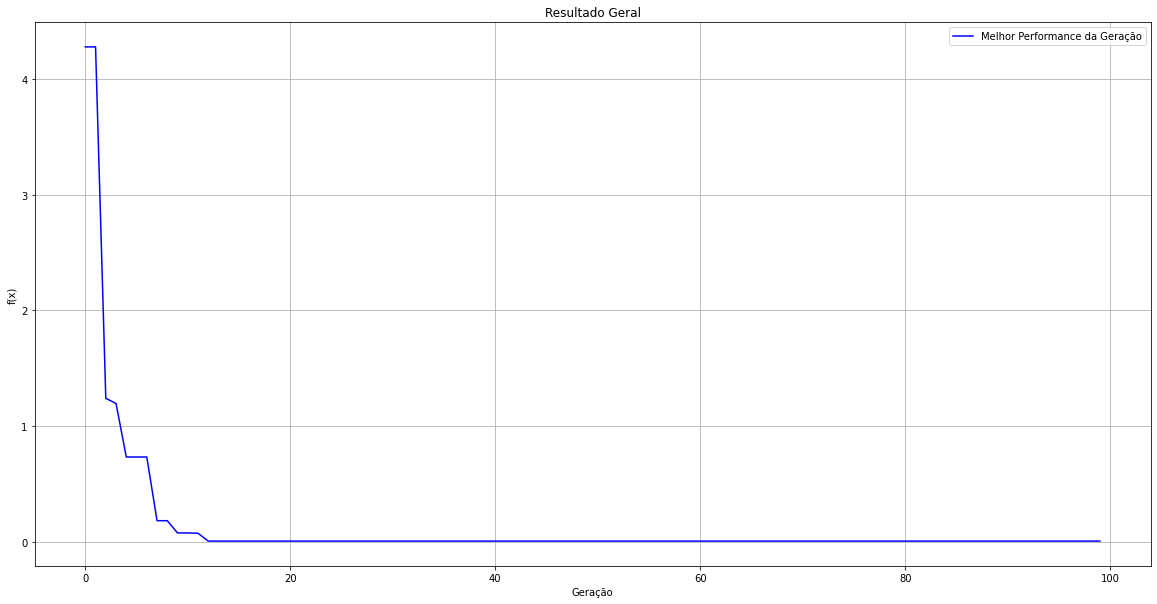

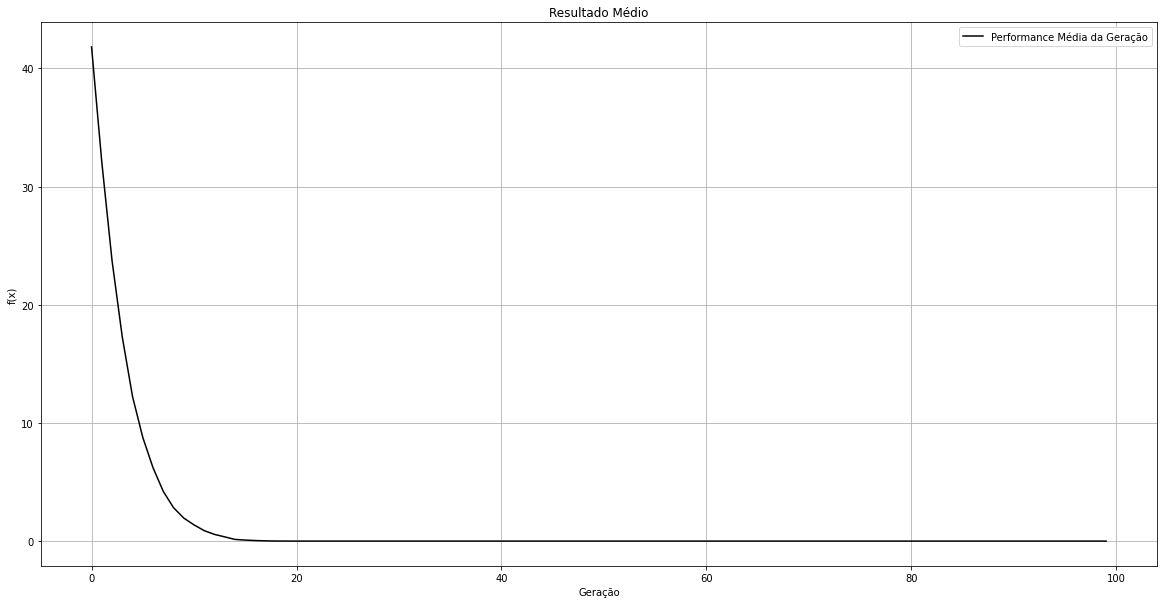

CPU times: user 3.01 s, sys: 20.8 ms, total: 3.03 s
Wall time: 3.03 s


In [43]:
#Teste 12
%%time
qnt_populacao = 1000
selecao = 'Roleta'
taxa_cruz = 0.5
taxa_mut = 0.5
taxa_elit = 0.5

seed = 42
n_geracoes = 100
tam_bin = 10
popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)